In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # computer vision
from PIL import Image # image processing
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

In [2]:
from keras.datasets import mnist

In [3]:
tf.random.set_seed(3)

In [4]:
# loading the mnist data from keras.datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# normalizing the values
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
type(x_train)

numpy.ndarray

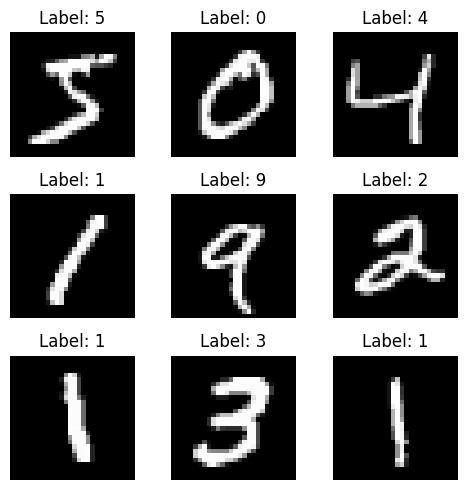

In [8]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'softmax') 
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
history = model.fit(x_train, y_train, epochs = 12, validation_split = 0.1)

Epoch 1/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8242 - loss: 0.5532 - val_accuracy: 0.9578 - val_loss: 0.1425
Epoch 2/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9517 - loss: 0.1578 - val_accuracy: 0.9638 - val_loss: 0.1170
Epoch 3/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9652 - loss: 0.1124 - val_accuracy: 0.9633 - val_loss: 0.1145
Epoch 4/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9724 - loss: 0.0878 - val_accuracy: 0.9707 - val_loss: 0.1006
Epoch 5/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9778 - loss: 0.0701 - val_accuracy: 0.9718 - val_loss: 0.0984
Epoch 6/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0600 - val_accuracy: 0.9690 - val_loss: 0.1096
Epoch 7/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0529 - val_accuracy: 0.9713 - val_loss: 0.1139
Epoch 8/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0469 - 

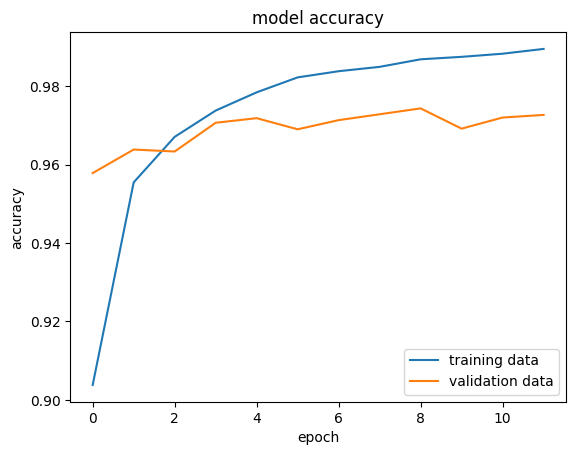

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

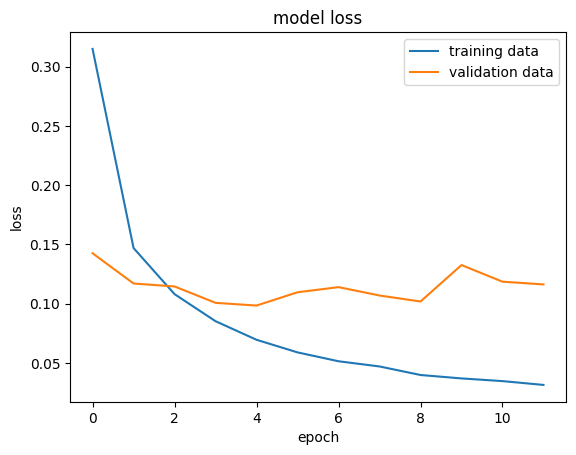

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print("accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9697 - loss: 0.1154
accuracy: 0.9732000231742859


In [15]:
Y_pred = model.predict(x_test)
print(Y_pred.shape) # we get a list of ten value for each prediction
Y_pred_label = [np.argmax(i) for i in Y_pred]
# print("The answer is: ", Y_pred_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
(10000, 10)


# Confustion Matrix

In [16]:
conf_mat = confusion_matrix(y_test, Y_pred_label)

In [17]:
print(conf_mat)

tf.Tensor(
[[ 965    0    2    3    0    0    3    2    3    2]
 [   0 1118    4    1    0    1    2    1    8    0]
 [   1    3 1006    6    3    0    2    6    4    1]
 [   1    0    2  994    0    2    0    3    7    1]
 [   1    0    4    1  950    0    2    7    0   17]
 [   3    0    0   13    0  867    2    1    4    2]
 [   5    3    1    1    7   13  921    0    7    0]
 [   1    5    8   10    0    0    0  993    3    8]
 [   4    0    6    6    4    6    0    5  939    4]
 [   2    4    0    4    9    4    0    6    1  979]], shape=(10, 10), dtype=int32)


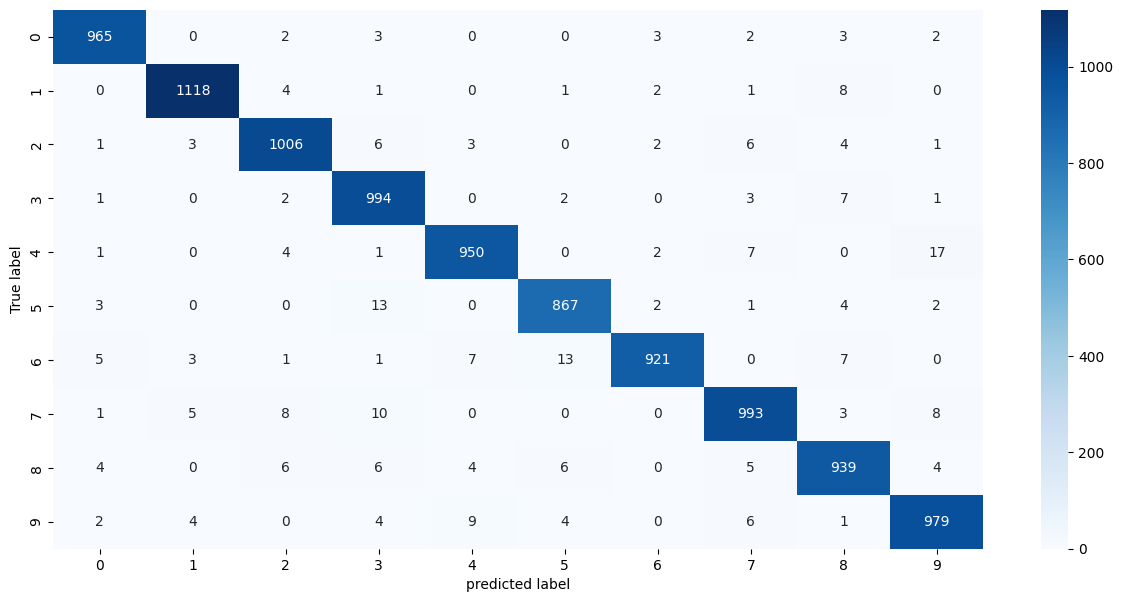

In [18]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

# Evaluating the model

In [21]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test_accuracy:", test_accuracy)
print("test_loss:", test_loss)
print("train_accuracy:", train_accuracy)
print("train_loss:", train_loss)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0269
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - loss: 0.1154
test_accuracy: 0.9732000231742859
test_loss: 0.10736551880836487
train_accuracy: 0.9892666935920715
train_loss: 0.03540438413619995


# Building a predictive system

In [22]:
g = 1002
# plt.imshow(x_train[g])
input_picture = x_train[g]
print(input_picture.shape)
print(y_train[g])

# input_data_std = input_picture / 255
reshaped_input_pic = np.reshape(input_picture, [1,28,28])

Y_prediction = model.predict(reshaped_input_pic)
print(Y_prediction)
label = np.argmax(Y_prediction)
print(label)

(28, 28)
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1.24447758e-10 9.99982357e-01 4.52482311e-07 7.79485333e-07
  1.19067714e-07 5.56478824e-07 5.05905851e-09 1.36578092e-05
  1.74156003e-06 3.47094414e-07]]
1
